In [1]:
pip install Flask matplotlib plotly plotly-express python-dotenv nltk numpy pandas regex scikit-learn wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
 pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import font_manager
from tempfile import NamedTemporaryFile
import urllib.request as urllib2
import matplotlib.font_manager as fm
import plotly_express as px
import plotly.figure_factory as ff
import wordcloud
import nltk
import warnings
import requests
from io import BytesIO
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix


**LOAD THE DATASET**

In [4]:
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None)

In [5]:
df

0                                                  1
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

**ROWS AND COLUMNS IN DATAFRAME**

In [6]:
df.shape

(5572, 2)

# DATA CLEANING

**SUMMARY OF THE DATASET**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**APPENDING COLUMNS**

In [8]:
df.columns = ['target', 'message']
df

target                                            message
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

**CLASS DISTRIBUTION**

In [9]:
class_counts = df['target'].value_counts()
print(class_counts)

ham     4825
spam     747
Name: target, dtype: int64


**ENCODE THE VALUES IN THE target COLUMN OF THE DATAFRAME**

In [10]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

target                                            message
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

**CHECK FOR NULL VALUES**

In [11]:
df.isnull().sum()

target     0
message    0
dtype: int64

**VERIFY DUPLICATE VALUES**

In [12]:
df.duplicated().sum()

403

**REMOVE DUPLICATE VALUES**

In [13]:
df = df.drop_duplicates(keep='first')
df

target                                            message
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0               Will ü b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]

Note that rows have been reduced  from 5571 to 5169 after DUPLICATED values have been removed

# EXPLORATORY DATA ANALYSIS(EDA)

To determine if a problem is a classification issue, a few factors need to be considered:
- Distinct classes or categories of "ham" or "spam," the target variable must be determined. This variable signifies distinct categories, showing that the problem is a classification issue. 
- Commonly, categorical data labels like "ham" and "spam" mark the data. 
- Metrics specific to classification problems, such as accuracy, precision, recall, and F1-score, evaluate model performance in spam classification.
- Explicitly, the problem statement outlines the task of recognizing whether a message is "ham" or "spam," which directly supports the classification nature of this problem.
- Identifying spam messages is a classic task in natural language processing (NLP), where text is classified into two categories - "ham" (legitimate messages) and "spam" (unsolicited or unwanted content).
Considering the critical analysis of the given information, it's clear that differentiating "ham" and "spam" in a dataset is a classification challenge.

**COUNT THE UNIQUE OCCURENCE OF SPAM AND HAM MESSAGES**

In [14]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

**DISTRIBUTION OF LABELS – HISTOGRAM**

In [15]:
fig = px.histogram(df, x="target", color="target", color_discrete_sequence=["#a01b9b","#fb9e3a"])
fig.show()
fig.write_image("images/Distribution Of Labels – Histogram.png")

**PIE CHART - PERCENTAGE OF HAM TO SPAM**

In [16]:
fig = px.pie(df.target.value_counts(),labels='index', values='target', color="target", color_discrete_sequence=["#a01b9b","#fb9e3a"] )
fig.update_layout(title_text="Percentage of Ham to Spam", title_x=0.5)
fig.show()
fig.write_image("images/Percentage of Ham to Spam.png")

One class significantly outnumbers the other, classification models may struggle to achieve satisfactory results hence data is inbalanced

In this analysis, we'll be examining the number of letters, words, and sentences in the text, and for that purpose, we'll create three new columns. The first column will count the number of characters, the second the number of words, and the third the number of sentences in the SMS. We'll be using the 'nltk' library for text processing, a powerful Natural Language Toolkit available through pip install nltk.

In [17]:
#downloading the dependencies 
#punkt package includes pre-trained models for tokenizing text in many languages
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\John
[nltk_data]     Franklin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#Adding a column that counts the number of characters.
df['characterscount'] = df['message'].apply(len)

#Creating a new column that counts the number of words.
df['wordscount'] = df['message'].apply(lambda i:len(nltk.word_tokenize(i)))
#The function 'word_tokenize' accepts a text string and generates a list of its constituent words.

#Create a new column to count sentences.
df['sentencescount'] = df['message'].apply(lambda i:len(nltk.sent_tokenize(i)))
#The function 'sent_tokenize' accepts input as a text string and outputs a list of sentences.

Show the reflected change to the dataframe

In [19]:
df.head()

target                                            message  characterscount  \
0       0  Go until jurong point, crazy.. Available only ...              111   
1       0                      Ok lar... Joking wif u oni...               29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...              155   
3       0  U dun say so early hor... U c already then say...               49   
4       0  Nah I don't think he goes to usf, he lives aro...               61   

   wordscount  sentencescount  
0          24               2  
1           8               2  
2          37               2  
3          13               1  
4          15               1

Provides a summary of various statistical measures such as count, mean, standard deviation, minimum value, quartiles, and maximum of the 3 new column values

In [20]:
df[['characterscount', 'wordscount', 'sentencescount']].describe()

characterscount   wordscount  sentencescount
count      5169.000000  5169.000000     5169.000000
mean         79.344554    18.591023        1.954924
std          58.437457    13.402840        1.366937
min           2.000000     1.000000        1.000000
25%          36.000000     9.000000        1.000000
50%          61.000000    15.000000        1.000000
75%         119.000000    26.000000        2.000000
max         910.000000   220.000000       28.000000

Extract summaries classified as HAM

In [21]:
df[df['target'] == 0][['characterscount', 'wordscount', 'sentencescount']].describe()

characterscount   wordscount  sentencescount
count      4516.000000  4516.000000     4516.000000
mean         70.905890    17.264836        1.806244
std          56.715046    13.587852        1.281910
min           2.000000     1.000000        1.000000
25%          34.000000     8.000000        1.000000
50%          53.000000    13.000000        1.000000
75%          91.000000    22.000000        2.000000
max         910.000000   220.000000       28.000000

Extract summaries classified as SPAM

In [22]:
df[df['target'] == 1][['characterscount', 'wordscount', 'sentencescount']].describe()

characterscount  wordscount  sentencescount
count       653.000000  653.000000      653.000000
mean        137.704441   27.762634        2.983155
std          29.821348    6.993008        1.489645
min          13.000000    2.000000        1.000000
25%         132.000000   25.000000        2.000000
50%         148.000000   29.000000        3.000000
75%         157.000000   32.000000        4.000000
max         223.000000   46.000000        8.000000

Spam messages contain significantly more characters than non-spam messages, averaging at 137.70 compared to 70.91.

**DATAFRAME FILTERED INTO SPAM AND HAM MESSAGES HISTOGRAMS**

In [23]:
ham_df = df[df['target'] == 0]
spam_df = df[df['target'] == 1]


fig_ham = px.histogram(ham_df, x='characterscount', color="target", color_discrete_sequence=["#a01b9b"])
fig_spam = px.histogram(spam_df, x='characterscount', color="target", color_discrete_sequence=["#fb9e3a"])


fig_spam.update_layout(title_text="Histogram of Ham and Spam Message Characters Count", title_x=0.5)

# Overlay the second histogram on top of the first one
fig_spam.add_trace(fig_ham.data[0])
fig_spam.show()
fig_spam.write_image("images/Histogram of Ham and Spam Message Characters Count.png")

In [24]:
ham_df = df[df['target'] == 0]
spam_df = df[df['target'] == 1]


fig_ham = px.histogram(ham_df, x='wordscount', color="target", color_discrete_sequence=["#a01b9b"])
fig_spam = px.histogram(spam_df, x='wordscount', color="target", color_discrete_sequence=["#fb9e3a"])


fig_spam.update_layout(title_text="Histogram of Ham and Spam Message Words Count", title_x=0.5)

# Overlay the second histogram on top of the first one
fig_spam.add_trace(fig_ham.data[0])
fig_spam.show()
fig_spam.write_image("images/Histogram of Ham and Spam Message Word Count.png")

In [25]:
# Create scatter matrix plot

fig = px.scatter_matrix(df, dimensions=["characterscount", "wordscount", "sentencescount"], 
                        color = "target", 
                        color_discrete_map = {'0': '#19D3F3', '1': '#FF9900'},
                        title = "Pair Plot")
fig.show()
fig.write_image("images/Scatter matrix plot.png")

C:\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Calculate the correlation coefficient

In [26]:
df.corr(numeric_only=True)

target  characterscount  wordscount  sentencescount
target           1.000000         0.379791    0.260238        0.286064
characterscount  0.379791         1.000000    0.966012        0.636644
wordscount       0.260238         0.966012    1.000000        0.682956
sentencescount   0.286064         0.636644    0.682956        1.000000

In [27]:
correlation_matrix = df.corr(numeric_only=True).round(2)
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale = 'reds',  title = "Correlation Matrix")
fig.show()
fig.write_image("images/Correlation Matrix.png")

There exists multi-collinearity between the number of sentences, words, and characters. Since the 'Characters Count' column has a wider range (0.38), it has been chosen for analysis.

# DATA PREPROCESSING

Prior to data analysis, it is crucial to refine it through various means. This can include tokenization (converting text into words), removal of special characters, stop words, and punctuation. The text can also be subjected to lemmatization and lower-casing processes, among others, making it ready for efficient analysis and processing.

In [28]:
#Download the stopwords corpus from NLTK (Natural Language Toolkit),
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\John
[nltk_data]     Franklin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\John
[nltk_data]     Franklin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\John
[nltk_data]     Franklin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re

In [30]:
def preprocess_text(text):
    # Converting to lower case
    text = text.lower()

    # Remove email addresses
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', text)

    # Replace web addresses with 'webaddress'
    text = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress', text)

    # Replace money symbols with 'money-symbol'
    text = re.sub(r'£|\$', 'money-symbol', text)

    # Replace 10-digit phone numbers with 'phone-number'
    text = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number', text)

    # Replace normal numbers with 'number'
    text = re.sub(r'\d+(\.\d+)?', 'number', text)
                  
    #Remove whitespace between terms with single space
    text = re.sub(r'\s+', ' ', text)
                  
    # Remove leading and trailing whitespace
    text = re.sub(r'^\s+|\s*?$', ' ', text)

    # Remove any remaining special characters and punctuations
    text = re.sub(r'\W+', ' ', text)  

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stopwords_list = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stopwords_list]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return " ".join(lemmas)

In [31]:
#Append a new column to store the transformed text -> 'processed'
df['processed'] = df['message'].apply(preprocess_text)

#displaying the updated dataframe with the new column 'processed'
df.head()

target                                            message  characterscount  \
0       0  Go until jurong point, crazy.. Available only ...              111   
1       0                      Ok lar... Joking wif u oni...               29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...              155   
3       0  U dun say so early hor... U c already then say...               49   
4       0  Nah I don't think he goes to usf, he lives aro...               61   

   wordscount  sentencescount  \
0          24               2   
1           8               2   
2          37               2   
3          13               1   
4          15               1   

                                           processed  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry number wkly comp win fa cup final t...  
3                u dun say early hor u c already say  
4                nah think go usf life around though

Create a word cloud for data visualization to showcase the most frequent words in the processed dataset. 

**WORD CLOUD - SPAM AND HAM MESSAGES**

In [32]:
data_ham  = df[df['target'] == 0].copy()
data_spam = df[df['target'] == 1].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="#ffffff",
                                        width = 3000, height = 2000).generate(text)
    plt.figure(figsize=(15,15), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title + '\n')   
    plt.tight_layout() 
    plt.savefig("images/" + title+ ".png", format='png')  # Save the figure as PNG
    plt.show()
   

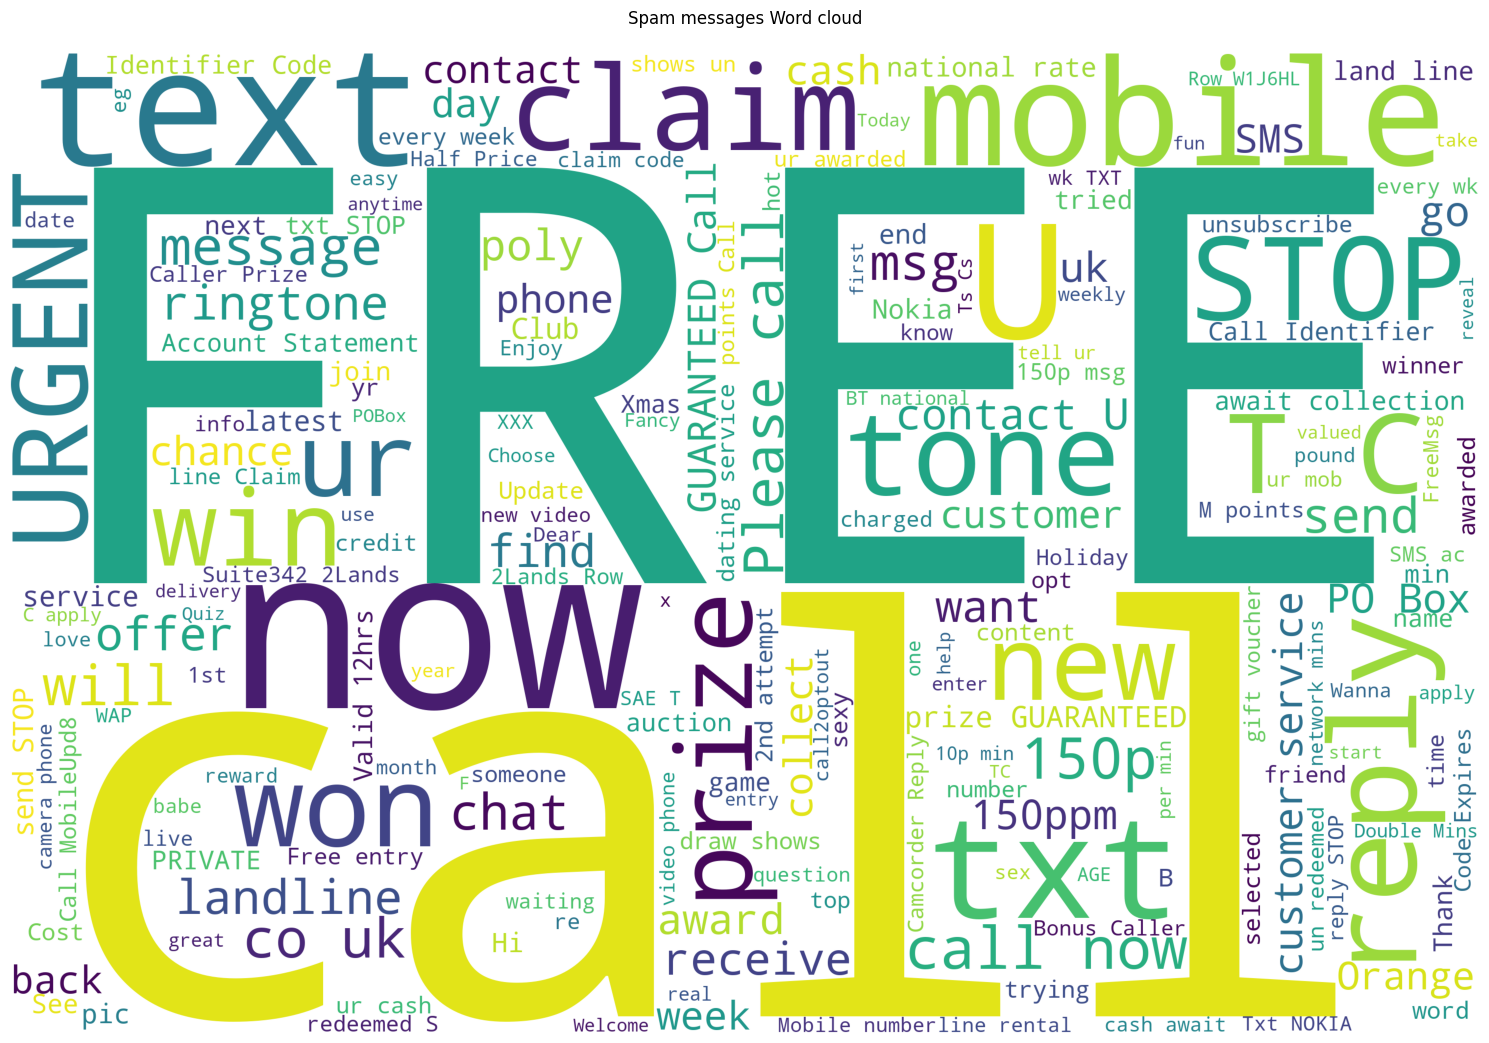

In [33]:
show_wordcloud(data_spam, "Spam messages Word cloud")

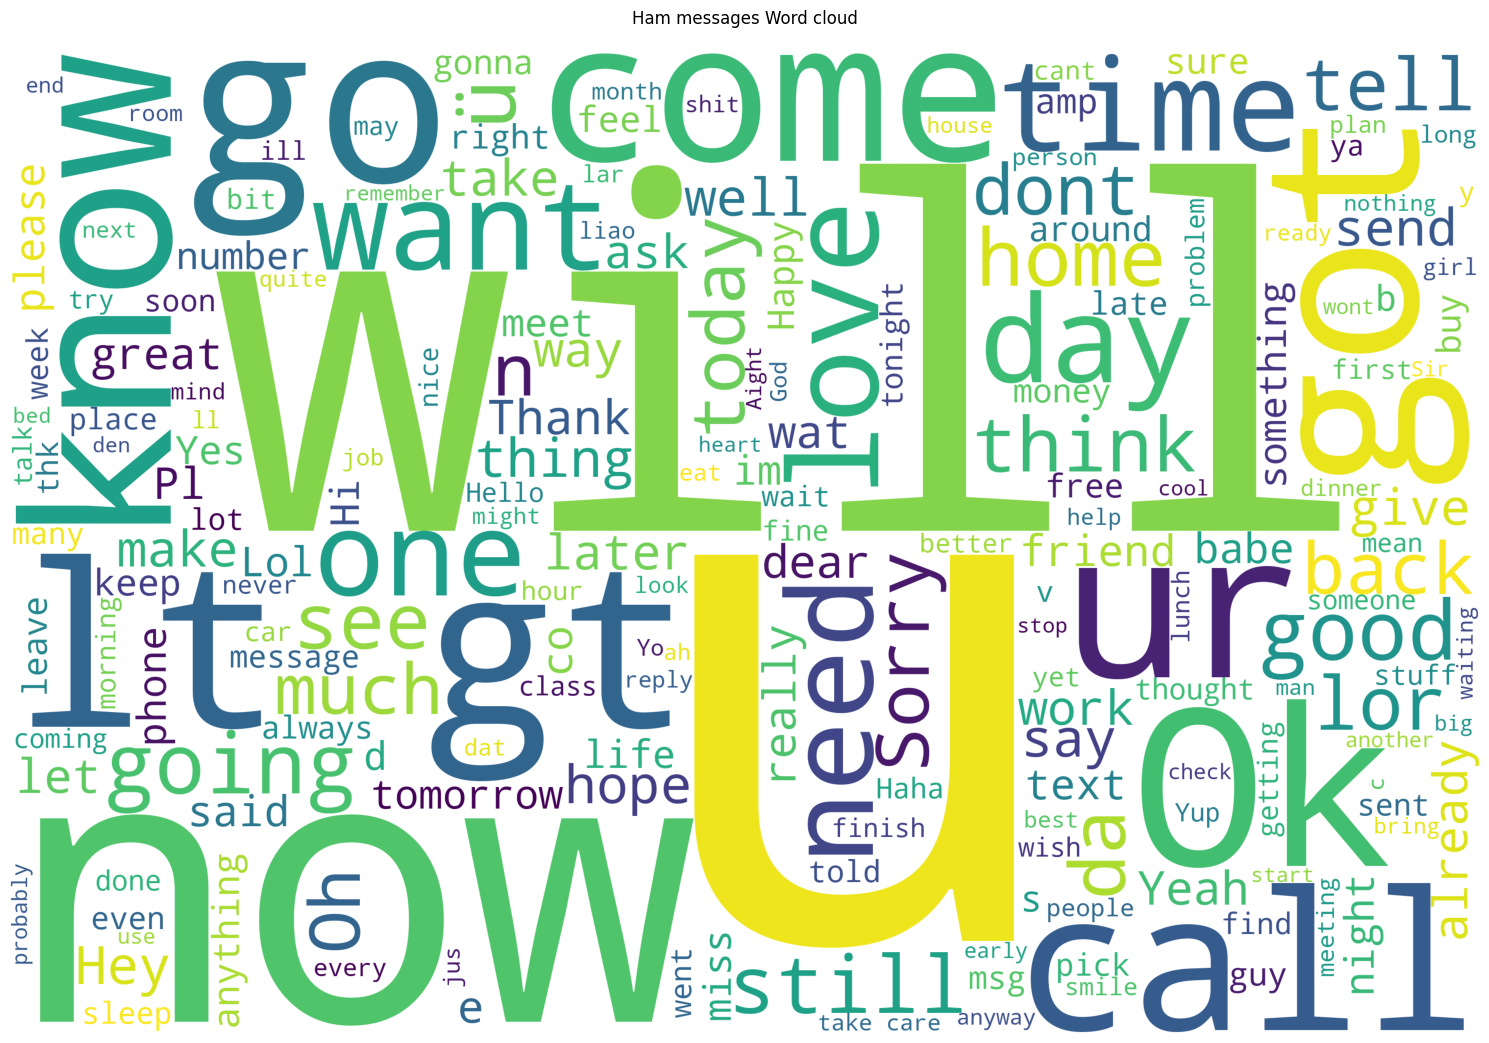

In [34]:
show_wordcloud(data_ham, "Ham messages Word cloud")

Extracting and plotting the most frequently used words in both spam and non-spam messages.

In [35]:
def plot_most_common_words(df, target,  title, num_words=40):
    spam_words = [word for msg in df[df['target'] == target]['processed'].tolist() for word in msg.split()]
    spam_words_dictionary = Counter(spam_words)
    most_common_spam = pd.DataFrame(spam_words_dictionary.most_common(num_words))
    
    fig = px.bar(most_common_spam, x=0, y=1, color=target, title=title)
    fig.update_layout(xaxis_tickangle=-90, title_x=0.5)
    fig.show()
    fig.write_image("images/" + title + ".png")

In [36]:
plot_most_common_words(df,  1, "Most common used words in spam" )

According to the chart, the most commonly used words in spam texts are 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', and 'MOBIL'.

In [37]:
plot_most_common_words(df,  0, "Most common used words in ham" )

# MODEL BUILDING

In [38]:
df.head()

target                                            message  characterscount  \
0       0  Go until jurong point, crazy.. Available only ...              111   
1       0                      Ok lar... Joking wif u oni...               29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...              155   
3       0  U dun say so early hor... U c already then say...               49   
4       0  Nah I don't think he goes to usf, he lives aro...               61   

   wordscount  sentencescount  \
0          24               2   
1           8               2   
2          37               2   
3          13               1   
4          15               1   

                                           processed  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry number wkly comp win fa cup final t...  
3                u dun say early hor u c already say  
4                nah think go usf life around though

In [39]:
# Create an instance of CountVectorizer
countvectorizer = CountVectorizer()

# Fit and transform the dataframe column of processed SMS messages into a Bag-of-Words matrix
X = countvectorizer.fit_transform(df['processed']).toarray()

# Print the Bag-of-Words matrix
print("Bag-of-Words Matrix Shape:")
X.shape

Bag-of-Words Matrix Shape:


(5169, 7369)

In [40]:
#storing the values of the 't'arget' column
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
#splitting the training and testing dataset specifiying that 20% of the data will be used for testing, while the remaining 80% will be used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [42]:
#creating the objects for the models
gnb_model = GaussianNB()
mnb_model = MultinomialNB()
bnb_model = BernoulliNB()

In [43]:
# Training the dataset using Gaussian Naive Bayes
gnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_gnb = gnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_gnb)
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.9061895551257253
Confusion matrix:  [[812  86]
 [ 11 125]]
Precision score:  0.5924170616113744


In [44]:
# Training the dataset using Multinomial Naive Bayes
mnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_mnb = mnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_mnb)
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
precision = precision_score(y_test, y_pred_mnb)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.9796905222437138
Confusion matrix:  [[884  14]
 [  7 129]]
Precision score:  0.9020979020979021


In [45]:
# Training the dataset using Bernoulli Naive Bayes
bnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_bnb = bnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_bnb)
conf_matrix = confusion_matrix(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.9806576402321083
Confusion matrix:  [[896   2]
 [ 18 118]]
Precision score:  0.9833333333333333


Our primary focus should be on achieving precision without compromising accuracy. Currently, we are operating at a maximum precision of 9.83 while maintaining 9.80 accuracy. We therefore employ more  

TfidfVectorizer considers both the local term frequency in a document and the global term frequency across all documents, while CountVectorizer only considers the local term frequency. TfidfVectorizer is often considered more advanced and useful for tasks like text classification, information retrieval, and sentiment analysis than countVectorizer so we will employ its usage

In [46]:
#using 'TfidfVectorizer' for vectorization 
tfvectorizer = TfidfVectorizer()

#transforming the data of processed column
X = tfvectorizer.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
y = df['target'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [47]:
# Training the dataset using Gaussian Naive Bayes
gnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_gnb_tfidf = gnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_gnb_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_gnb_tfidf)
precision = precision_score(y_test, y_pred_gnb_tfidf)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.8974854932301741
Confusion matrix:  [[811  87]
 [ 19 117]]
Precision score:  0.5735294117647058


In [48]:
# Training the dataset using Multinomial Naive Bayes
mnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_mnb_tfidf = mnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_mnb_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_mnb_tfidf)
precision = precision_score(y_test, y_pred_mnb_tfidf)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.9642166344294004
Confusion matrix:  [[898   0]
 [ 37  99]]
Precision score:  1.0


In [49]:
# Training the dataset using Bernoulli Naive Bayes
bnb_model.fit(X_train, y_train)

#Predict using the trained model
y_pred_bnb_tfidf = bnb_model.predict(X_test)

#Print accuracy, confusion matrix and precision score
accuracy = accuracy_score(y_test, y_pred_bnb_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred_bnb_tfidf)
precision = precision_score(y_test, y_pred_bnb_tfidf)

print("Accuracy score: ", accuracy)
print("Confusion matrix: ", conf_matrix)
print("Precision score: ", precision)

Accuracy score:  0.9806576402321083
Confusion matrix:  [[896   2]
 [ 18 118]]
Precision score:  0.9833333333333333


In datasets like ours with an imbalance ratio, accuracy alone can be deceitful since a model that predicts the majority class (ham) for all instances can still achieve high accuracy. However, such a model may fail to identify the minority class (spam) appropriately. In this case, the precision score gives an insight into the model's ability to classify correctly. This metric is particularly vital in imbalanced datasets where correctly identifying the minority class can be challenging.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [51]:
# Creating objects of the classifier models
support_vector_classifier = SVC(kernel='sigmoid', gamma=1.0)
k_nearest_neighbors_classifier = KNeighborsClassifier()
multinomial_naive_bayes_classifier = MultinomialNB()
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
logistic_regression_classifier = LogisticRegression(solver='liblinear', penalty='l1')
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=2)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=2)
bagging_classifier = BaggingClassifier(n_estimators=50, random_state=2)
extra_trees_classifier = ExtraTreesClassifier(n_estimators=50, random_state=2)
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [52]:
# Creating a dictionary that maps short names to the corresponding classification models
classifiers = {
    'SVC': support_vector_classifier,
    'KN': k_nearest_neighbors_classifier,
    'NB': multinomial_naive_bayes_classifier,
    'DT': decision_tree_classifier,
    'LR': logistic_regression_classifier,
    'RF': random_forest_classifier,
    'AdaBoost': adaboost_classifier,
    'BgC': bagging_classifier,
    'ETC': extra_trees_classifier,
    'GBDT': gradient_boosting_classifier,
}

In [53]:
# Creating a function which uses train-test split data, trains the model, and returns the scores
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1, 1]  # True positives
    fp = cm[0, 1]  # False positives
    return accuracy, precision, tp, fp

In [54]:
# Initializing lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []
tp_scores = []
fp_scores = []

# Training and evaluating each classifier
for name, clf in classifiers.items():
    current_accuracy, current_precision, current_tp, current_fp = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("True Positives:", current_tp)
    print("False Positives:", current_fp)
    print("--------------------------")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    tp_scores.append(current_tp)
    fp_scores.append(current_fp)

For SVC
Accuracy: 0.9816247582205029
Precision: 0.9465648854961832
True Positives: 124
False Positives: 7
--------------------------
For KN
Accuracy: 0.9081237911025145
Precision: 1.0
True Positives: 41
False Positives: 0
--------------------------
For NB
Accuracy: 0.9642166344294004
Precision: 1.0
True Positives: 99
False Positives: 0
--------------------------
For DT
Accuracy: 0.9593810444874274
Precision: 0.9122807017543859
True Positives: 104
False Positives: 10
--------------------------
For LR
Accuracy: 0.9729206963249516
Precision: 0.9354838709677419
True Positives: 116
False Positives: 8
--------------------------
For RF
Accuracy: 0.9825918762088974
Precision: 1.0
True Positives: 118
False Positives: 0
--------------------------
For AdaBoost
Accuracy: 0.9845261121856866
Precision: 0.96875
True Positives: 124
False Positives: 4
--------------------------
For BgC
Accuracy: 0.9806576402321083
Precision: 0.9142857142857143
True Positives: 128
False Positives: 12
-------------------

In [55]:
# Converting accuracy, precision, TP, and FP scores to a DataFrame and sorting by precision score
performance = pd.DataFrame({'Algorithm': classifiers.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores, 'True Positives': tp_scores, 'False Positives': fp_scores}).sort_values('Precision', ascending=False)
performance

Algorithm  Accuracy  Precision  True Positives  False Positives
1        KN  0.908124   1.000000              41                0
2        NB  0.964217   1.000000              99                0
5        RF  0.982592   1.000000             118                0
8       ETC  0.985493   0.991870             122                1
6  AdaBoost  0.984526   0.968750             124                4
9      GBDT  0.979691   0.967480             119                4
0       SVC  0.981625   0.946565             124                7
4        LR  0.972921   0.935484             116                8
7       BgC  0.980658   0.914286             128               12
3        DT  0.959381   0.912281             104               10

Precision plays a critical role when handling imbalanced data, as it measures the accuracy of positive predictions. Precision is also just as relevant as accuracy, given the imbalanced dataset. We also want  to eliminate or minimize the number of false positives in the model.  We can attempt to boost accuracy using an ensemble machine learning model.

The VotingClassifier, an ensemble machine learning model in scikit-learn, is a powerful tool for predictive analytics. It combines numerous individual classifiers and aggregates their predictions through either majority voting (for classification tasks) or averaging (for regression tasks). The result is a highly-accurate and robust model that is well-suited to large datasets. As a form of ensemble learning, it leverages the strengths and insights of multiple models, resulting in superior performance. We want to use it to improve/maximize acurracy score.

In [56]:
# We use the multinomial naive bayes classifier, random forest classifier and extra trees classifier since they have the highest accuracy values in relation to precision.

#creating the objects for the classifier classes
multinomial_naive_bayes_classifier_voting = MultinomialNB()
extra_trees_classifier_voting = ExtraTreesClassifier(n_estimators=50, random_state=2)
random_forest_classifier_voting = RandomForestClassifier(n_estimators=50, random_state=2)

#Create a VotingClassifier ensemble model with three estimators: RandomForestClassifier (rf), MultinomialNB (nb), and ExtraTreesClassifier (et). 
#The voting method is set to 'soft', indicating that the predicted probabilities from each classifier will be averaged to make the final prediction
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('rf', random_forest_classifier_voting), ('nb', multinomial_naive_bayes_classifier_voting), ('et', extra_trees_classifier_voting)],voting='soft')

In [57]:
#Train the data
voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [58]:
y_pred = voting_classifier.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 1.0


Compared to the highest  accuracy with precision score of 1, accuracy is reduced.

Since our accuracy is reduced, we employ stacking, also known as stacked generalization, which is also an effective ensemble learning technique used to improve predictive performance by combining multiple models (base models). It works by training a meta-model that leverages the strengths of each base model's individual predictions.
By doing so, we hope to provide a powerful way to achieve a more comprehensive learning model, reducing the risk of overfitting and improving the overall accuracy of predictions.

In [59]:
#Stacking of NB, RF and ETC
estimators=[('rf', random_forest_classifier), ('nb', multinomial_naive_bayes_classifier), ('et', extra_trees_classifier)]

#most weightage to ETC
final_estimator=ExtraTreesClassifier()

In [60]:
from sklearn.ensemble import StackingClassifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [61]:
#training the dataset
stacking_classifier.fit(X_train,y_train)
y_pred = stacking_classifier.predict(X_test)

#printing the scores
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9624060150375939


Using stacking did lead to a decrease in precision and accuracy. Ultimately, the extra tree classifier proves to be the most effective, striking a balance between high accuracy and slightly lower precision. This makes it a reliable predictor for both spam and ham.  Remember to save the result of the vectorizer and model.

In [62]:
import os
import pickle

# Create the "model" directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the vectorizer
with open('model/vectorizer.pkl', 'wb') as f:
    pickle.dump(tfvectorizer, f)

with open('model/model.pkl', 'wb') as f:
    pickle.dump(extra_trees_classifier, f)

print("Model and vectorizer saved to 'model' directory.")

Model and vectorizer saved to 'model' directory.


In [ ]:
# Function to classify text as spam or ham
# spam: Congratulations, you have been gifted 0.5 BTC. Click here to claim it now!
# ham: Hello Frank. How are you doing today?

# Load the vectorizer and model
vectorizer = pickle.load(open('model/vectorizer.pkl', 'rb'))
model = pickle.load(open('model/model.pkl', 'rb'))

# Function to classify text as spam or ham
def classify_text(text):
    # Preprocess the text
    preprocessed_text = preprocess_text(text)

    # Vectorize the preprocessed text
    vectorized_text = vectorizer.transform([preprocessed_text])

    # Make predictions using the model
    prediction = model.predict(vectorized_text)

    # Return the prediction (1 for spam, 0 for ham)
    return prediction[0]

# Test the program
text = input("Enter the text to classify: ")
classification = classify_text(text)

if classification == 1:
    print("The text is classified as spam.")
else:
    print("The text is classified as ham.")